## Network simulation details

This notebook contains the code for simulating gene trees from a number of networks using the software `ms`. For each network, we generated 30 replicates each depicting 30, 100, 300, 1000, and 3000 gene trees for use with the software `TICR` and `MSCquartets`. We generated 30 replicates each of 10,000, 50,000, 100,000, 250,000, and 500,000 gene trees for use with the software `HyDe`, which also generates site pattern frequencies enabling calculation of Patterson's D-Statistic.

### Networks following Kong and Kubatko 2021 

To both replicate and verify results of HyDe and the D-Statistic, as well as conform to networks previous papers have used to compare other reticulation detection methods (ADMIXTURE, STRUCTURE), we are using four smaller networks that were used in "Comparative Performance of Popular Methods for Hybrid Detection using Genomic Data" by Kong and Kubatko. We use a different method to simulate gene trees using `ms`. Our approach differs, as theirs samples from networks that were decomposed into trees, we sample directly from the network by using the split `-es` and rejoin `-ej` method (CITE) to depict hybridization events in `ms`. We also simulate only one individual per taxon.

The networks that we simulate have the following Newick formats, and correspond to Fig 1a, 1b, 1e, and 1f of the original Kong and Kubatko paper. (CITE)

1a = (4:8.0,((1:1.5,#H1:0.75::0.5):1.5,(3:1.5,(2:0.75)#H1:0.75::0.5):1.5):5.0);
1b = (4:8.0,((3:1.5,#H1:0::0.5):1.5,(1:1.5,(2)#H1:0::0.5):1.5):5.0);
1e = (8:11.0,((((1:1.5,#H1:0.75::0.5):1.5,(3:1.5,(2:0.75)#H1:0.75::0.5):1.5):1.5,(4:3.75)#H3:0.75::0.5):1.5,(((5:1.5,#H2:0.75::0.5):1.5,(7:1.5,(6:0.75)#H2:0.75::0.5):1.5):1.5,#H3:0.75::0.5):1.5):5.0);
1f = (5:9.5,(((1:1.5,#H1:0.75::0.5):1.5,((3:1.5,(2:0.75)#H1:0.75::0.5):0.75)#H2:0.75::0.5):1.5,(4:3.0,#H2:0.75::0.5):1.5):5.0);

![Untitled](https://s3-us-west-2.amazonaws.com/secure.notion-static.com/108bd396-e1d5-42c2-894b-3f096c840387/Untitled.png)

In [ ]:
# The following displays ms commands for generating each network and sampling gene trees.
gene_trees=(30 100 300 1000 3000 10000 50000 100000 250000 500000)
for gt in ${gene_trees}
do
    for i in {1..30}
    do
        
    # a four taxon network with a hybrid speciation event with varying gamma values (fig 1a)
    ms 4 ${gt} -T -I 4 1 1 1 1 -es 0.75 2 0.5 -ej 1.5 5 1 -ej 1.5 3 2 -ej 3.0 2 1 -ej 8.0 4 1 | grep -v // > n4h1_0.5.net-gt${gt}-${i}.tre
    ms 4 ${gt} -T -I 4 1 1 1 1 -es 0.75 2 0.6 -ej 1.5 5 1 -ej 1.5 3 2 -ej 3.0 2 1 -ej 8.0 4 1 | grep -v // > n4h1_0.4.net-gt${gt}-${i}.tre
    ms 4 ${gt} -T -I 4 1 1 1 1 -es 0.75 2 0.7 -ej 1.5 5 1 -ej 1.5 3 2 -ej 3.0 2 1 -ej 8.0 4 1 | grep -v // > n4h1_0.3.net-gt${gt}-${i}.tre
    ms 4 ${gt} -T -I 4 1 1 1 1 -es 0.75 2 0.8 -ej 1.5 5 1 -ej 1.5 3 2 -ej 3.0 2 1 -ej 8.0 4 1 | grep -v // > n4h1_0.2.net-gt${gt}-${i}.tre
    ms 4 ${gt} -T -I 4 1 1 1 1 -es 0.75 2 0.9 -ej 1.5 5 1 -ej 1.5 3 2 -ej 3.0 2 1 -ej 8.0 4 1 | grep -v // > n4h1_0.1.net-gt${gt}-${i}.tre
    ms 4 ${gt} -T -I 4 1 1 1 1 -es 0.75 2 1.0 -ej 1.5 5 1 -ej 1.5 3 2 -ej 3.0 2 1 -ej 8.0 4 1 | grep -v // > n4h1_0.net-gt${gt}-${i}.tre
        
    # a four taxon network with an introgression event (fig 1b)
    ms 4 ${gt} -T -I 4 1 1 1 1 -es 0.75 2 0.5 -ej 1.5 1 2 -ej 0.75 5 3 -ej 3.0 3 2 -ej 8.0 4 2 | grep -v // > n4h1_introg.net-gt${gt}-${i}.tre
        
    # an eight taxon network with three non-overlapping hybrid speciation events (fig 1e)
    ms 8 ${gt} -T -I 8 1 1 1 1 1 1 1 1 -es 0.75 2 0.5 -ej 1.5 9 3 -ej 1.5 2 1 -es 0.75 6 0.5 -ej 1.5 6 5 -ej 1.5 10 7 -es 3.75 4 0.5 -ej 4.5 4 1 -ej 4.5 11 5 -ej 3.0 7 5 -ej 3.0 3 1 -ej 6.0 5 1 -ej 11.0 8 1 | grep -v // > n8h3.net-gt${gt}-${i}.tre
        
    # a five taxon network with two hybrid speciation events, where on hybrid species is one parent of the other (fig 1f)
    ms 5 ${gt} -T -I 5 1 1 1 1 1 -es 0.75 2 0.5 -ej 1.5 6 3 -ej 1.5 2 1 -es 2.25 3 0.5 -ej 3.0 3 1 -ej 3.0 7 4 -ej 4.5 4 1 -ej 9.5 5 1 | grep -v // > n5h2_overlap.net-gt${gt}-${i}.tre
    
    done    
done

In [ ]:
# These same networks without hybridizations (or their major tree) would be generated as follows

# 1a 
ms 4 ${gt} -T -I 4 1 1 1 1 -ej 1.5 2 1 -ej 3.0 3 1 -8.0 4 1
# 1b
ms 4 ${gt} -T -I 4 1 1 1 1 -ej 1.5 2 1 -ej 3.0 3 1 -8.0 4 1
# 1e
ms 8 ${gt} -T -I 8 1 1 1 1 1 1 1 1 -ej 1.5 2 1 -ej 1.5 6 5 -ej 3.0 7 5 -ej 3.0 3 1 -ej 4.5 4 1 -ej 6.0 5 1 -ej 11.0 8 1
# 1f
ms 5 ${gt} -T -I 5 1 1 1 1 1 -ej 1.5 2 1 -ej 3.0 3 1 -ej 4.5 4 1 -ej 9.5 5 1


### Networks following Solis-Lemus and Ane (2016)

[PhyloNetworks](https://academic.oup.com/mbe/article/34/12/3292/4103410)

Other ultrametric network tested include:
- N6H1, which contains one (1) reticulation event has the extended newick format:

((((1,2),((3,4))#H1),(#H1,5)),6);

- N10H2, which contains two (2) reticulation events has the extended newick format:

(10:9.6,(#H1:2.9::0.3,(1:7.2,(2:6.0,(((9:0.4)#H2:5.0::0.8,(3:4.4,(4:3.5,((5:0.2,6:0.2):2.1,(7:1.4,(8:0.4,#H2:0.0::0.2):1.0):0.9):1.2):0.9):1.0):0.1)#H1:0.5::0.7):1.2):1.2):1.2);

- N15H3, which contains three (3) reticulation events has the extended newick format:

(15:11.0,(1:10.0,((14:8.0,(((7:2.8,((10:0.6)#H3:1.0::0.8,(9:0.4,8:0.4):1.2):1.2):0.8,((11:1.6,#H3:1.0::0.2):1.2,(13:0.4,12:0.4):2.4):0.8):3.4, #H1:0.4::0.3):1.0):1.2, ((((2:0.4,3:0.4):1.4)#H2:3.8::0.8,(((4:2.8,#H2:1.0::0.2):0.8,5:3.6):1.2,6:4.8):0.8 ):1.0)#H1:2.6::0.7):0.8):1.0);


- N25H5, which contains five (5) reticulation events has the extended newick format:

(25:15.0,((23:13.0,(((5:10.0,((((7:1.0,3:1.0):6.0,(((10:4.0,(16:3.0,((6:1.0,12:1.0):1.0,#H26:1.0::0.369):1.0):1.0):1.0,(8:2.0,(11:1.0)#H26:1.0::0.631):3.0):1.0,1:6.0):1.0):1.0)#H30:1.0::0.656,((((22:3.0,(20:2.0,#H28:1.0::0.449):1.0):1.0,18:4.0):1.0,13:5.0):1.0,(((9:2.0,(15:1.0)#H32:1.0::0.605):1.0,((21:1.0,17:1.0):1.0,#H32:1.0::0.395):1.0):1.0,(2:1.0)#H28:3.0::0.551):2.0):3.0):1.0):1.0,(((19:1.0,14:1.0):1.0,4:2.0):7.0,#H30:1.0::0.344):2.0):1.0)#H34:1.0::0.976):1.0,(24:13.0,#H34:1.0::0.024):1.0):1.0);

- N50H10, which contains ten (10) reticulation events has the extended newick format:

(50:18.0,(26:17.0,(((33:1.0,46:1.0):10.0,#H51:1.0::0.17):5.0,(10:15.0,((11:1.0,43:1.0):13.0,(((((((1:3.0,(48:2.0,(27:1.0)#H59:1.0::0.746):1.0):1.0,17:4.0):1.0,(((45:2.0,(39:1.0)#H61:1.0::0.763):1.0,28:3.0):1.0,#H61:3.0::0.237):1.0):1.0,((38:1.0,21:1.0):1.0,#H59:1.0::0.254):4.0):5.0,(((((16:6.0,(((5:3.0,(19:2.0,(42:1.0)#H65:1.0::0.542):1.0):1.0,#H65:3.0::0.458):1.0)#H63:1.0::0.758):1.0,44:7.0):1.0,((2:1.0,15:1.0):5.0,#H63:1.0::0.242):2.0):1.0,((18:4.0,(20:3.0,#H67:1.0::0.27):1.0):1.0,((3:1.0,31:1.0):1.0)#H67:3.0::0.73):4.0):1.0)#H51:1.0::0.83):1.0,((7:2.0,(37:1.0)#H53:1.0::0.631):1.0,(24:2.0,#H53:1.0::0.369):1.0):9.0):1.0,(((23:8.0,(13:7.0,#H55:1.0::0.105):1.0):1.0,((((40:1.0,34:1.0):3.0,(((12:1.0,14:1.0):1.0,30:2.0):1.0)#H69:1.0::0.504):1.0,((32:2.0,(41:1.0,4:1.0):1.0):2.0,#H69:1.0::0.496):1.0):1.0,25:6.0):3.0):2.0,(9:10.0,(35:9.0,(29:8.0,(47:7.0,((((36:1.0,22:1.0):3.0,(6:3.0,(8:2.0,#H57:1.0::0.374):1.0):1.0):1.0,(49:1.0)#H57:4.0::0.626):1.0)#H55:1.0::0.895):1.0):1.0):1.0):1.0):2.0):1.0):1.0):1.0):1.0):1.0);

In [ ]:
#N6H1
ms 6 ${gt} -T -I 6 1 1 1 1 1 1


#### These (N10H2, and N15H3) were further decomposed into networks containing single reticulation events.
#### Additionally, the major tree from N10 and N15 was created

#N10H2
ms 10 ${gt} -T -I 10 1 1 1 1 1 1 1 1 1 1 -ej 0.2 6 5 -es 0.4 9 0.8 -ej 0.4 11 8 -ej 1.4 8 7 -ej 2.3 7 5 \
            -ej 3.5 5 4 -ej 4.4 4 3 -ej 5.4 9 3 -es 5.5 3 0.7 -ej 6.0 3 2 -ej 7.2 2 1 -ej 8.4 12 1 -ej 9.6 10 1 | grep -v // > n10h2.net-gt${gt}-${i}.tre
#N10Red (retaining only -es 5.5 3 0.7)
ms 10 ${gt} -T -I 10 1 1 1 1 1 1 1 1 1 1 -ej 0.2 6 5 -ej 1.4 8 7 -ej 2.3 7 5 \
            -ej 3.5 5 4 -ej 4.4 4 3 -ej 5.4 9 3 -es 5.5 3 0.7 -ej 6.0 3 2 -ej 7.2 2 1 -ej 8.4 11 1 -ej 9.6 10 1 | grep -v // > n10red.net-gt${gt}-${i}.tre
#N10Orange (retaining only -es 0.4 9 0.8)
ms 10 ${gt} -T -I 10 1 1 1 1 1 1 1 1 1 1 -ej 0.2 6 5 -es 0.4 9 0.8 -ej 0.4 11 8 -ej 1.4 8 7 -ej 2.3 7 5 \
            -ej 3.5 5 4 -ej 4.4 4 3 -ej 5.4 9 3 -ej 6.0 3 2 -ej 7.2 2 1 -ej 9.6 10 1 | grep -v // > n10orange.net-gt${gt}-${i}.tre
#N10Major (no reticulations)
ms 10 ${gt} -T -I 10 1 1 1 1 1 1 1 1 1 1 -ej 0.2 6 5 -ej 1.4 8 7 -ej 2.3 7 5 \
            -ej 3.5 5 4 -ej 4.4 4 3 -ej 5.4 9 3 -ej 6.0 3 2 -ej 7.2 2 1 -ej 9.6 10 1 | grep -v // > n10major.net-gt${gt}-${i}.tre

# n15h3
ms 15 ${gt} -T -I 15 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 -ej 0.4 9 8 -ej 0.4 3 2 -ej 0.4 13 12 \
                -es 0.6 10 0.8 -ej 1.6 10 8 -ej 1.6 16 11 \
                -es 1.8 2 0.8 -ej 2.8 17 4 -ej 3.6 5 4 \
                -ej 4.8 6 4 -ej 5.6 4 2 -ej 2.8 12 11 \
                -ej 2.8 8 7 -ej 3.6 11 7 -es 6.6 2 0.7 \
                -ej 7.0 18 7 -ej 8.0 14 7 -ej 9.2 7 2 \
                -ej 10.0 2 1 -ej 11.0 15 1 | grep -v // > n15h3.net-gt${gt}-${i}.tre

#n15red
ms 15 ${gt} -T -I 15 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 -ej 0.4 9 8 -ej 0.4 3 2 -ej 0.4 13 12 \
    -es 1.8 2 0.8 -ej 2.8 16 4 -ej 3.6 5 4 -ej 4.8 6 4 -ej 5.6 4 2 -ej 1.6 10 8 -ej 2.8 12 11 \
    -ej 2.8 10 7 -ej 3.6 11 7 -ej 8.0 14 7 -ej 9.2 7 2 -ej 10.0 2 1 -ej 11.0 15 1 | grep -v // > n15red.net-gt${gt}-${i}.tre

#n15orange
ms 15 ${gt} -T -I 15 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 -ej 0.4 9 8 -ej 0.4 3 2 -ej 0.4 13 12 -es 0.6 10 0.8 \
    -ej 3.6 5 4 -ej 4.8 6 4 -ej 5.6 4 2 -ej 1.6 10 8 -ej 1.6 16 11 -ej 2.8 12 11 \
    -ej 2.8 8 7 -ej 3.6 11 7 -ej 8.0 14 7 -ej 9.2 7 2 -ej 10 2 1 -ej 11.0 15 1 | grep -v // > n15orange.net-gt${gt}-${i}.tre

#N15blue
ms 15 ${gt} -T -I 15 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 -ej 0.4 9 8 -ej 0.4 3 2 -ej 0.4 13 12 \
    -ej 3.6 5 4 -ej 4.8 6 4 -ej 5.6 4 2 -ej 1.6 10 8 -ej 2.8 12 11 \
    -ej 2.8 8 7 -ej 3.6 11 7 -es 6.6 2 0.7 -ej 7.0 16 7 -ej 8.0 14 7 -ej 9.2 7 2 -ej 10 2 1 -ej 11.0 15 1 | grep -v // > n15blue.net-gt${gt}-${i}.tre

#N15Major (no reticulations)
ms 15 ${gt} -T -I 15 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 -ej 0.4 9 8 -ej 0.4 3 2 -ej 0.4 13 12 \
    -ej 3.6 5 4 -ej 4.8 6 4 -ej 5.6 4 2 -ej 1.6 10 8 -ej 2.8 12 11 \
    -ej 2.8 8 7 -ej 3.6 11 7 -ej 8.0 14 7 -ej 9.2 7 2 -ej 10 2 1 -ej 11.0 15 1 | grep -v // > n15major.net-gt${gt}-${i}.tre

#n25h5
ms 25 ${gt} -T -I 25 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 -ej 1.00 12 6 -ej 1.00 7 3 -ej 1.00 21 17 -ej 1.00 19 14 -es 1.00 2 0.551 \
    -ej 2.00 26 20 -es 1.00 11 0.631 -ej 2.00 27 6 -es 1.00 15 0.605 -ej 2.00 28 17 -ej 2.00 14 4 -ej 2.00 15 9 -ej 2.00 11 8 -ej 3.00 17 9 \
    -ej 3.00 16 6 -ej 3.00 22 20 -ej 4.00 9 2 -ej 4.00 10 6 -ej 4.00 20 18 -ej 5.00 18 13 -ej 5.00 8 6 -ej 6.00 13 2 -ej 6.00 6 1 -ej 7.00 3 1 \
    -es 8.00 1 0.656 -ej 9.00 2 1 -ej 9.00 29 4 -ej 10.00 5 1 -ej 11.00 4 1 -es 12.00 1 0.976 -ej 13.00 30 24 -ej 13.00 23 1 -ej 14.00 24 1 -ej 15.00 25 1 | grep -v // > n25h5.net-gt${gt}-${i}.tre

#n50h10
ms 50 ${gt} -T -I 50 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 \
    -ej 1.00 46 33 -ej 1.00 43 11 -ej 1.00 38 21 -ej 1.00 15 2 -ej 1.00 31 3 -ej 1.00 40 34 -ej 1.00 14 12 -ej 1.00 41 4 \
    -ej 1.00 36 22 -es 1.00 27 0.746 -es 1.00 37 0.631 -es 1.00 39 0.763 -es 1.00 42 0.542 -es 1.00 49 0.626 -ej 2.00 51 21 \
    -ej 2.00 52 24 -ej 4.00 53 28 -ej 4.00 54 5 -ej 2.00 55 8 -ej 2.00 48 27 -ej 2.00 45 39 -ej 2.00 42 19 -ej 2.00 37 7 \
    -ej 2.00 30 12 -ej 2.00 32 4 -es 2.00 3 0.73 -ej 3.00 56 20 -ej 3.00 24 7 -ej 3.00 27 1 -ej 3.00 39 28 -ej 3.00 19 5 \
    -ej 3.00 8 6 -es 3.00 12 0.504 -ej 4.00 57 4 -ej 4.00 17 1 -ej 4.00 20 18 -ej 4.00 34 12 -ej 4.00 22 6 -ej 5.00 49 6 \
    -ej 5.00 12 4 -ej 5.00 18 3 -ej 5.00 28 1 -es 5.00 5 0.758 -ej 6.00 25 4 -ej 6.00 58 2 -ej 6.00 16 5 -ej 6.00 21 1 \
    -es 6.00 6 0.895 -ej 7.00 47 6 -ej 7.00 59 13 -ej 7.00 44 5 -ej 8.00 29 6 -ej 8.00  23 13 -ej 8.00 5 2 -ej 9.00 35 6 \
    -ej 9.00 13 4 -ej 9.00 3 2 -ej 10.00 9 6 -es 10.00 2 0.83 -ej 11.00 6 4 -ej 11.00 2 1 -ej 11.00 60 33 -ej 12.00 7 1 \
    -ej 13.00 4 1 -ej 14.00 11 1 -ej 15.00 10 1 -ej 16.00 33 1 -ej 17.00 26 1 -ej 18.00 50 1 | grep -v // > n50h10.net-gt${gt}-${i}.tre


In [ ]:
gene_trees=(30 100 300 1000 3000 10000 50000 100000 250000 500000)
for gt in ${gene_trees}
do
    for i in {1..30}
    do
      
    ms 50 ${gt} -T -I 50 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 \
    -ej 1.00 46 33 -ej 1.00 43 11 -ej 1.00 38 21 -ej 1.00 15 2 -ej 1.00 31 3 -ej 1.00 40 34 -ej 1.00 14 12 -ej 1.00 41 4 \
    -ej 1.00 36 22 -es 1.00 27 0.746 -es 1.00 37 0.631 -es 1.00 39 0.763 -es 1.00 42 0.542 -es 1.00 49 0.626 -ej 2.00 51 21 \
    -ej 2.00 52 24 -ej 4.00 53 28 -ej 4.00 54 5 -ej 2.00 55 8 -ej 2.00 48 27 -ej 2.00 45 39 -ej 2.00 42 19 -ej 2.00 37 7 \
    -ej 2.00 30 12 -ej 2.00 32 4 -es 2.00 3 0.73 -ej 3.00 56 20 -ej 3.00 24 7 -ej 3.00 27 1 -ej 3.00 39 28 -ej 3.00 19 5 \
    -ej 3.00 8 6 -es 3.00 12 0.504 -ej 4.00 57 4 -ej 4.00 17 1 -ej 4.00 20 18 -ej 4.00 34 12 -ej 4.00 22 6 -ej 5.00 49 6 \
    -ej 5.00 12 4 -ej 5.00 18 3 -ej 5.00 28 1 -es 5.00 5 0.758 -ej 6.00 25 4 -ej 6.00 58 2 -ej 6.00 16 5 -ej 6.00 21 1 \
    -es 6.00 6 0.895 -ej 7.00 47 6 -ej 7.00 59 13 -ej 7.00 44 5 -ej 8.00 29 6 -ej 8.00  23 13 -ej 8.00 5 2 -ej 9.00 35 6 \
    -ej 9.00 13 4 -ej 9.00 3 2 -ej 10.00 9 6 -es 10.00 2 0.83 -ej 11.00 6 4 -ej 11.00 2 1 -ej 11.00 60 33 -ej 12.00 7 1 \
    -ej 13.00 4 1 -ej 14.00 11 1 -ej 15.00 10 1 -ej 16.00 33 1 -ej 17.00 26 1 -ej 18.00 50 1 | grep -v // > n50h10.net-gt${gt}-${i}.tre
    
 done    
done

### Appendix: Ultrametric transformation of n25 and n50

Additional tests were run on larger and more complex networks n25 and n50.
The original newick formats are as follows:
- n25h5
((t23:0.1529152972,(((t5:0.1742374953,((((t7:0.03701669352,t3:0.03701669352):0.3407026256,(((t10:0.04459338561,(t16:0.02154361617,((t6:0.003451109906,t12:0.003451109906):0.01528756611593066,#H26:0.0::0.36876441171047525):0.0028049401540693394):0.02304976944):0.1443262328,(t8:0.01505489628,(t11:0.0001302054392005513)#H26:0.01492469084079945::0.6312355882895248):0.1738647222):0.04565597165,t1:0.2345755901):0.143143729):0.8555897296291333)#H30:0.7465149403708666::0.6562886539999526,((((t22:0.002735944325,(t20:0.0009194177853483883,#H28:0.0::0.4488376427119638):0.0018165265396516118):0.06284850635,t18:0.06558445067):0.01147941802,t13:0.07706386869):0.1775396659,(((t9:0.001097780354,(t15:0.0006062338328663671)#H32:0.0004915465211336328::0.6048820881657472):0.1249432998,((t21:0.01920083843,t17:0.01920083843):0.0672246242136909,#H32:0.0::0.3951179118342528):0.039615617586309104):0.07923131404,(t2:0.14875716867381913)#H28:0.05651522552618088::0.5511623572880362):0.04933114034):3.921257451):1.805586494):0.01838017514,(((t19:0.02301105435,t14:0.02301105435):0.02867005422,t4:0.05168110857):0.08023888482507495,#H30:0.0::0.3437113460000474):0.02393732677492505):0.0)#H34:0.00294202294::0.976224958374261):0.1415983706,t25:0.01131692658,(t24:0.0077794867038045645,#H34:0.0::0.023775041625738957):0.0035374398761954346);

- n50h10
(t47:0.05177072613,((((t36:0.003428749006,t22:0.003428749006):0.01240251222,(t6:0.01290934997,(t8:0.009425372227473734,#H57:0.0::0.37380054083849945):0.0034839777425262654):0.002921911258):0.02034182637,(t49:0.019522330991654856)#H57:0.016650756608345144::0.6261994591615005):0.012176830878405197)#H55:0.003420807651594802::0.8954611242021273,(t29:0.0526742672,(t35:0.2374548864,(t9:0.5438904482,(((t23:0.003089894389,(t13:0.0015062362559237464,#H55:0.0::0.10453887579787269):0.0015836581330762535):0.436039298,((((t40:0.01769632163,t34:0.01769632163):0.03817527622,(((t12:0.01121808816,t14:0.01121808816):0.01703303727,t30:0.02825112543):0.010599192013828097)#H69:0.0170212804061719::0.5037365014034482):0.2186398228,((t32:0.04119839191,(t41:0.01178447182,t4:0.01178447182):0.02941392008):0.1844719883179142,#H69:0.0::0.49626349859655183):0.04884104048208579):0.05929878178,t25:0.3338102024):0.10531899):0.3716187965,(((((((t1:0.01614258433,(t48:0.00283291296,(t27:0.000959510649556119)#H59:0.001873402310443881::0.7457154135487248):0.01330967137):0.0181853095,t17:0.03432789383):0.03661209161,(((t45:0.0104528864,(t39:0.009872451523684836)#H61:0.000580434876315164::0.7628770677272928):0.03428785289,t28:0.04474073929):0.000490993973684847,#H61:0.0::0.2371229322727072):0.025708252176315154):0.1962451608,((t38:4.855301265e-5,t21:4.855301265e-5):0.15653745235515826,#H59:0.0::0.25428458645127516):0.11059914084484174):0.05880900007,(((((t16:0.02383452404,(((t5:0.003827521334,(t19:0.003062964696,(t42:0.00019239895977932542)#H65:0.0028705657362206745::0.5421810124791409):0.0007645566377):0.008359224616739538,#H65:0.0::0.45781898752085914):0.01065585614732944)#H63:0.0009919219459310208::0.7579948709047674):0.031948943,t44:0.05578346704):0.02157146065,((t2:0.04726783103,t15:0.04726783103):0.002283172611213812,#H63:0.0::0.24200512909523264):0.02780392405878619):0.2282209392,((t18:0.0001155719489,(t20:5.357460869631712e-5,#H67:0.0::0.26981736830018366):6.199734020368289e-5):0.1509282624,((t3:0.008678237065,t31:0.008678237065):0.11832547664994125)#H67:0.024040120650058755::0.7301826316998163):0.1545320325):0.0014969921342505642)#H51:0.018921287255749434::0.8300609054807365):0.3230017674,((t7:0.142569309,(t37:0.13305868121801592)#H53:0.009510627781984082::0.6309977789766279):0.05789280689,(t24:0.0030767986607765003,#H53:0.0::0.3690022210233721):0.19738531723922348):0.4485337978):0.109423985,((((t26:0.00876043783,t50:0.00876043783):0.007253468364,((t33:0.002864784778,t46:0.002864784778):0.007385892301794623,#H51:0.0::0.16993909451926348):0.005763229108205378):0.00932059669,t10:0.02533450288):0.1378718332,(t11:0.04645822057,t43:0.04645822057):0.1167481155):0.5952135626):0.01876091092):0.2668575407):0.3064355618):0.1847806192):0.0009035410624);


Both of these networks were not initially ultrametric, as their tips were various distances away from the root of the tree. To solve this issue, networks were converted to ultrametric networks through the use of rerooting, and converting branch lengths (or edges) to minimize the length of the longest branch, with the minimum distance of each branch being 1 coalescent unit.


In [ ]:
using PhyloNetworks
using PhyloPlots

include("/phylo-microbes/scripts/HelperFunctions/makeUltrametric.jl")

n25h5 = readTopology(n25h5.net)
n50h10 = readTopology(n50h10.net)
PhyloNetworks.rootatnode!(n25h5, "t25")
PhyloNetworks.rootatnode!(n50h10, "t50")
makeUltrametricByNodeDepth(n25h5)
makeUltrametricByNodeDepth(n50h10)

This results in the following topologies:

n25h5 = (25:15.0,((23:13.0,(((5:10.0,((((7:1.0,3:1.0):6.0,(((10:4.0,(16:3.0,((6:1.0,12:1.0):1.0,#H26:1.0::0.369):1.0):1.0):1.0,(8:2.0,(11:1.0)#H26:1.0::0.631):3.0):1.0,1:6.0):1.0):1.0)#H30:1.0::0.656,((((22:3.0,(20:2.0,#H28:1.0::0.449):1.0):1.0,18:4.0):1.0,13:5.0):1.0,(((9:2.0,(15:1.0)#H32:1.0::0.605):1.0,((21:1.0,17:1.0):1.0,#H32:1.0::0.395):1.0):1.0,(2:1.0)#H28:3.0::0.551):2.0):3.0):1.0):1.0,(((19:1.0,14:1.0):1.0,4:2.0):7.0,#H30:1.0::0.344):2.0):1.0)#H34:1.0::0.976):1.0,(24:13.0,#H34:1.0::0.024):1.0):1.0);

n50h10 = (50:18.0,(26:17.0,(((33:1.0,46:1.0):10.0,#H51:1.0::0.17):5.0,(10:15.0,((11:1.0,43:1.0):13.0,(((((((1:3.0,(48:2.0,(27:1.0)#H59:1.0::0.746):1.0):1.0,17:4.0):1.0,(((45:2.0,(39:1.0)#H61:1.0::0.763):1.0,28:3.0):1.0,#H61:3.0::0.237):1.0):1.0,((38:1.0,21:1.0):1.0,#H59:1.0::0.254):4.0):5.0,(((((16:6.0,(((5:3.0,(19:2.0,(42:1.0)#H65:1.0::0.542):1.0):1.0,#H65:3.0::0.458):1.0)#H63:1.0::0.758):1.0,44:7.0):1.0,((2:1.0,15:1.0):5.0,#H63:1.0::0.242):2.0):1.0,((18:4.0,(20:3.0,#H67:1.0::0.27):1.0):1.0,((3:1.0,31:1.0):1.0)#H67:3.0::0.73):4.0):1.0)#H51:1.0::0.83):1.0,((7:2.0,(37:1.0)#H53:1.0::0.631):1.0,(24:2.0,#H53:1.0::0.369):1.0):9.0):1.0,(((23:8.0,(13:7.0,#H55:1.0::0.105):1.0):1.0,((((40:1.0,34:1.0):3.0,(((12:1.0,14:1.0):1.0,30:2.0):1.0)#H69:1.0::0.504):1.0,((32:2.0,(41:1.0,4:1.0):1.0):2.0,#H69:1.0::0.496):1.0):1.0,25:6.0):3.0):2.0,(9:10.0,(35:9.0,(29:8.0,(47:7.0,((((36:1.0,22:1.0):3.0,(6:3.0,(8:2.0,#H57:1.0::0.374):1.0):1.0):1.0,(49:1.0)#H57:4.0::0.626):1.0)#H55:1.0::0.895):1.0):1.0):1.0):1.0):2.0):1.0):1.0):1.0):1.0):1.0);

Previous attempt at making ultrametric yielded networks with unreasonable branch lengths

In [ ]:
using PhyloNetworks

topology = readTopology(newick_format)
major_tree = majorTree(topology)

This resulted in the following major trees.

n25topo = "((t23:0.153,((t5:0.174,(((((t22:0.003,t20:0.003):0.063,t18:0.066):0.011,t13:0.077):0.178,(((t9:0.001,t15:0.001):0.125,(t21:0.019,t17:0.019):0.107):0.079,t2:0.205):0.049):3.921,((t7:0.037,t3:0.037):0.341,(((t10:0.045,(t16:0.022,(t6:0.003,t12:0.003):0.018):0.023):0.144,(t8:0.015,t11:0.015):0.174):0.046,t1:0.235):0.143):1.602):1.806):0.018,((t19:0.023,t14:0.023):0.029,t4:0.052):0.104):0.003):0.142,t25:0.011,t24:0.011);"

n50topo = "(t47:0.052,(t29:0.053,(t35:0.237,(t9:0.544,(((t23:0.003,t13:0.003):0.436,((((t40:0.018,t34:0.018):0.038,((t12:0.011,t14:0.011):0.017,t30:0.028):0.028):0.219,(t32:0.041,(t41:0.012,t4:0.012):0.029):0.233):0.059,t25:0.334):0.105):0.372,(((((((t1:0.016,(t48:0.003,t27:0.003):0.013):0.018,t17:0.034):0.037,((t45:0.01,t39:0.01):0.034,t28:0.045):0.026):0.196,(t38:0.0,t21:0.0):0.267):0.059,((((t16:0.024,(t5:0.004,(t19:0.003,t42:0.003):0.001):0.02):0.032,t44:0.056):0.022,(t2:0.047,t15:0.047):0.03):0.228,((t18:0.0,t20:0.0):0.151,(t3:0.009,t31:0.009):0.142):0.155):0.02):0.323,((t7:0.143,t37:0.143):0.058,t24:0.2):0.449):0.109,((((t26:0.009,t50:0.009):0.007,(t33:0.003,t46:0.003):0.013):0.009,t10:0.025):0.138,(t11:0.046,t43:0.046):0.117):0.595):0.019):0.267):0.306):0.185):0.001,(((t36:0.003,t22:0.003):0.012,(t6:0.013,t8:0.013):0.003):0.02,t49:0.036):0.016);"

Still, the issue of their lack ultrametric character remains. To address this, as well as their small branch size relative to other networks tested, the following R snippet resulted in major topologies.

In [ ]:
# Following https://brettkvo.com/how-to-create-a-ultrametric-dichotomous-phylogeny-in-r-using-vertlife-org-or-birdtree-org/
# we desire to turn these trees into ultrametric trees

library(ape)
library(phytools)
library(picante)
library(plyr)

treefile <- read.newick("n25topomajor.net")
consensus<-consensus.edges(treefile, consensus.tree=consensus(treefile,p=0.5))  
plotTree(consensus, fsize=0.6)
print(consensus$edge.length)

#how does it look?  too many zeros at the end?  There appears to be a bug.  If so, you will need to run the code below....
#This makes a single-number vector that represents the length of the consensus$edge.length
n <- length(consensus$edge.length)  

#need to reduce the number of elements by 1... We also add a very small amount to make sure no branch length is zero.    
consensus$edge.length <- consensus$edge.length[1:n-1] + .0000001
print(consensus$edge.length) 
#how does it look now?  It should not have a zero for the last row.  Plot to confirm it works.
plotTree(consensus, fsize=0.6)

consensus_ultra=chronos(consensus, lambda=0)
consensus_ultra$edge.length <- plyr::round_any(consensus_ultra$edge.length[1:n-1] + .0000001, 0.01, f = ceiling)  

consensus_ultra=chronos(consensus_ultra, lambda=0)
# Lambda is the rate-smoothing parameter.  Generally, we want lambda to be small, so there is very little smoothing  See here (citation at bottom): http://www.justinbagley.org/1226/update-new-functions-for-generating-starting-trees-for-beast-or-starbeast-in-r
#Check again; now it's ultrametric.
is.ultrametric(consensus_ultra) 

#Make the tree dichotomous (so each node splits into only two branches)   
tree.unmatched <- multi2di(consensus_ultra, random=TRUE) 
# scales the tree branch edges to be comparable to other networks we are using, 
tree.unmatched$edge.length <- tree.unmatched$edge.length * 20
#Let's plot our new tree.  Huzzah!
plotTree(tree.unmatched,fsize=0.6)

newick = write.tree(tree.unmatched)
print(newick)


n25 resulted in:

n25 = "((((((((((t9:0.5555555556,t15:0.5555555556):0.5555555556,(t21:0.5555555556,t17:0.5555555556):0.5555555556):0.5555555556,t2:1.666666667):0.5555555556,(((t22:0.5555555556,t20:0.5555555556):0.5555555556,t18:1.111111111):0.5555555556,t13:1.666666667):0.5555555556):0.5555555556,((((((t6:0.1157407407,t12:0.1157407407):0.1157407407,t16:0.2314814815):0.2314814815,t10:0.462962963):0.462962963,(t8:0.462962963,t11:0.462962963):0.462962963):0.462962963,t1:1.388888889):0.462962963,(t7:0.9259259259,t3:0.9259259259):0.9259259259):0.9259259259):0.5555555556,t5:3.333333333):3.333333333,((t19:2.222222222,t14:2.222222222):2.222222222,t4:4.444444444):2.222222222):3.333333333,t23:10):10,t25:20):0,t24:20);"

To ensure a single outgroup, it was changed to 
n25 = "((((((((((t9:0.5555555556,t15:0.5555555556):0.5555555556,(t21:0.5555555556,t17:0.5555555556):0.5555555556):0.5555555556,t2:1.666666667):0.5555555556,(((t22:0.5555555556,t20:0.5555555556):0.5555555556,t18:1.111111111):0.5555555556,t13:1.666666667):0.5555555556):0.5555555556,((((((t6:0.1157407407,t12:0.1157407407):0.1157407407,t16:0.2314814815):0.2314814815,t10:0.462962963):0.462962963,(t8:0.462962963,t11:0.462962963):0.462962963):0.462962963,t1:1.388888889):0.462962963,(t7:0.9259259259,t3:0.9259259259):0.9259259259):0.9259259259):0.5555555556,t5:3.333333333):3.333333333,((t19:2.222222222,t14:2.222222222):2.222222222,t4:4.444444444):2.222222222):3.333333333,t23:10):8,t24:18):2,t25:20);"


n50 resulted in

edge parent child  length  hybrid isMajor gamma   containRoot inCycle istIdentitiable
1    -3     1      0.153   false  true    1       true        -1      false
2    -6     2      0.174   false  true    1       false       -1      false
3    -10    3      0.037   false  true    1       false       -1      false
4    -10    4      0.037   false  true    1       false       -1      false
5    -9     -10    0.341   false  true    1       false       -1      true 
6    -13    5      0.045   false  true    1       false       -1      false
7    -14    6      0.022   false  true    1       false       -1      false
8    -16    7      0.003   false  true    1       false       -1      false
9    -16    8      0.003   false  true    1       false       -1      false
10   -15    -16    0.015   false  true    1       false       -1      true 
11   -15    9      0.000   true   false   0.3688  false       -1      false
12   -14    -15    0.003   false  true    1       false       -1      true 
13

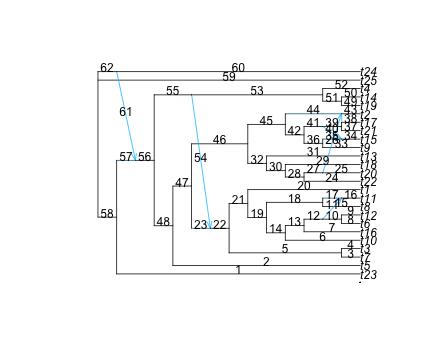

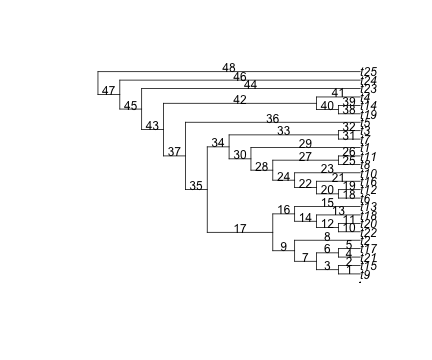

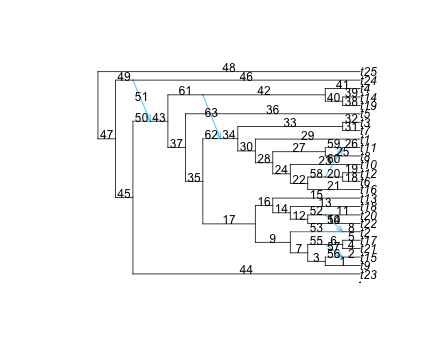

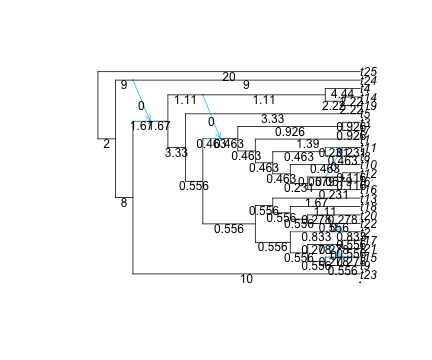

(-0.5, 17.65, 0.5, 25.5, [16.0, 16.0, 14.0, 16.0, 16.0, 15.0, 13.0, 16.0, 12.0, 16.0  …  3.0, 4.0, 14.0, 15.0, 14.0, 15.0, 14.0, 15.0, 7.0, 8.0], [2.0, 3.0, 2.5, 4.0, 5.0, 4.5, 3.5, 6.0, 4.75, 7.0  …  24.0, 19.123046875, 8.0, 6.0, 4.5, 3.0, 12.5, 16.0, 22.25, 17.046875], [0.0, 0.0, 2.0, 0.0, 0.0, 4.0, 2.5, 0.0, 3.5, 0.0  …  24.0, 19.123046875, 8.0, 6.0, 4.5, 3.0, 12.5, 16.0, 22.25, 17.046875], [0.0, 0.0, 3.0, 0.0, 0.0, 5.0, 4.5, 0.0, 6.0, 0.0  …  24.0, 19.123046875, 8.0, 6.0, 4.5, 3.0, 12.5, 16.0, 22.25, 17.046875], [14.0, 15.0, 13.0, 15.0, 15.0, 14.0, 12.0, 15.0, 10.0, 13.0  …  14.0, 13.0, 14.0, 14.0, 13.0, 14.0, 14.0, 5.0, 7.0, 7.0], [16.0, 16.0, 14.0, 16.0, 16.0, 15.0, 13.0, 16.0, 12.0, 16.0  …  14.0, 14.0, 15.0, 14.0, 14.0, 15.0, 14.0, 7.0, 8.0, 7.0], [2.0, 3.0, 2.5, 4.0, 5.0, 4.5, 3.5, 6.0, 4.75, 7.0  …  8.0, 4.5, 3.0, 4.5, 12.5, 16.0, 12.5, 22.25, 17.046875, 22.25], [2.0, 3.0, 2.5, 4.0, 5.0, 4.5, 3.5, 6.0, 4.75, 7.0  …  8.0, 4.5, 3.0, 4.5, 12.5, 16.0, 12.5, 22.25, 17.046875, 22.2

In [25]:
# adding edges back into n25:

using PhyloNetworks
using PhyloPlots

n25old = readTopology("((t23:0.1529152972,(((t5:0.1742374953,((((t7:0.03701669352,t3:0.03701669352):0.3407026256,(((t10:0.04459338561,(t16:0.02154361617,((t6:0.003451109906,t12:0.003451109906):0.01528756611593066,#H26:0.0::0.36876441171047525):0.0028049401540693394):0.02304976944):0.1443262328,(t8:0.01505489628,(t11:0.0001302054392005513)#H26:0.01492469084079945::0.6312355882895248):0.1738647222):0.04565597165,t1:0.2345755901):0.143143729):0.8555897296291333)#H30:0.7465149403708666::0.6562886539999526,((((t22:0.002735944325,(t20:0.0009194177853483883,#H28:0.0::0.4488376427119638):0.0018165265396516118):0.06284850635,t18:0.06558445067):0.01147941802,t13:0.07706386869):0.1775396659,(((t9:0.001097780354,(t15:0.0006062338328663671)#H32:0.0004915465211336328::0.6048820881657472):0.1249432998,((t21:0.01920083843,t17:0.01920083843):0.0672246242136909,#H32:0.0::0.3951179118342528):0.039615617586309104):0.07923131404,(t2:0.14875716867381913)#H28:0.05651522552618088::0.5511623572880362):0.04933114034):3.921257451):1.805586494):0.01838017514,(((t19:0.02301105435,t14:0.02301105435):0.02867005422,t4:0.05168110857):0.08023888482507495,#H30:0.0::0.3437113460000474):0.02393732677492505):0.0)#H34:0.00294202294::0.976224958374261):0.1415983706,t25:0.01131692658,(t24:0.0077794867038045645,#H34:0.0::0.023775041625738957):0.0035374398761954346);")
n25new = readTopology("((((((((((t9:0.5555555556,t15:0.5555555556):0.5555555556,(t21:0.5555555556,t17:0.5555555556):0.5555555556):0.5555555556,t2:1.666666667):0.5555555556,(((t22:0.5555555556,t20:0.5555555556):0.5555555556,t18:1.111111111):0.5555555556,t13:1.666666667):0.5555555556):0.5555555556,((((((t6:0.1157407407,t12:0.1157407407):0.1157407407,t16:0.2314814815):0.2314814815,t10:0.462962963):0.462962963,(t8:0.462962963,t11:0.462962963):0.462962963):0.462962963,t1:1.388888889):0.462962963,(t7:0.9259259259,t3:0.9259259259):0.9259259259):0.9259259259):0.5555555556,t5:3.333333333):3.333333333,((t19:2.222222222,t14:2.222222222):2.222222222,t4:4.444444444):2.222222222):3.333333333,t23:10):8,t24:18):2,t25:20);")


plot(n25old, :R, useEdgeLength=false, style = :majortree, showEdgeNumber=true, arrowlen=0.1, )
# to determine which edges to create new hybrids on
plot(n25new, :R, useEdgeLength=false, style = :majortree, showEdgeNumber=true, arrowlen=0.1)


printEdges(n25old)
print(n25old.hybrid)

net = n25old
# add in hybrids from edge:
#46->43 (0.024), 11->8(0.4488), 6->2(0.3951), 20->26(0.3688), 42->34 (0.3437)

PhyloNetworks.addhybridedge!(n25new, n25new.edge[46], n25new.edge[43], true, 0.0, 0.024)
PhyloNetworks.addhybridedge!(n25new, n25new.edge[11], n25new.edge[8], true, 0.0, 0.4488)
PhyloNetworks.addhybridedge!(n25new, n25new.edge[6], n25new.edge[2], true, 0.0, 0.3951)
PhyloNetworks.addhybridedge!(n25new, n25new.edge[20], n25new.edge[26], true, 0.0, 0.3688)
PhyloNetworks.addhybridedge!(n25new, n25new.edge[42], n25new.edge[34], true, 0.0, 0.3437)

plot(n25new, :R, useEdgeLength=false, style = :majortree, showEdgeNumber=true, arrowlen=0.1)

n25updated = writeTopology(n25new)
print(n25updated)

plot(n25new, :R, useEdgeLength=false, style = :majortree, showEdgeLength=true, arrowlen=0.1)




In [ ]:
# Timing of network analysis methods

# on WID server.

1. find path to WID server
2. login to proxy
3. ssh mbjorner@solislemus-001.discovery.wisc.edu
4. project is located at /mnt/dv/wid/projects4/Solis-Lemus-phylo-microbes
5. cd /mnt/dv/wid/projects4/Solis-Lemus-phylo-microbes
- software is in cd /mnt/dv/wid/projects1/
6. Command to copy::: scp ${file_name} mbjorner@solislemus-001.discovery.wisc.edu:/mnt/dv/wid/projects4/Solis-Lemus-phylo-microbes
7. copy sample of data (sequences/gene trees) to time
- tar -czvf 1b_seq_gt.tar.gz 1b_gt 1b_sequences
- scp 1b_seq_gt.tar.gz mbjorner@solislemus-001.discovery.wisc.edu:/mnt/dv/wid/projects4/Solis-Lemus-phylo-microbes
- tar -xvf 1b_seq_gt.tar.gz
8. copy scripts of functions
9. copy scripts to time

-hyde
-ticr 
-mscquartets
-d1_d2
-d3
```
filepath=/Users/bjorner/GitHub/ms_gene_trees/1a/1a_gt/
gene_trees=n4h1_0.net-gt50000-3.tre
mapfile=/Users/bjorner/GitHub/ms_gene_trees/maps_hyde/n4h1map.txt
d1_d2_out=/Users/bjorner/GitHub/phylo-microbes/scripts/CHTCFunctions/logs/${gene_trees}_D1_D2.csv
{ time python /Users/bjorner/GitHub/D3_introgression/analysis/d1_d2.py ${filepath}${gene_trees} ${mapfile} ${d1_d2_out} ; } \
 2> /Users/bjorner/GitHub/phylo-microbes/scripts/CHTCFunctions/logs/${gene_trees}_D1_D1_time.txt
{ time hyde.py }

```